## Merge-ATO-Outputs.py

This script demonstrates how to merge Access to Opportunities (ATO) tables from multiple years into one table. It also formats the columns to match the schema of the table at:

https://data.wfrc.org/datasets/access-to-opportunities-work-related-taz-based?geometry=-117.122%2C40.025%2C-106.669%2C41.481

#### Import required libraries

In [3]:
import pandas as pd
from simpledbf import Dbf5
import matplotlib.pyplot as plt
import os

#### Set styling for tables

In [3]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}
</style>

#### Build paths to .dbf tables

In [4]:
# Store highest common directory path
scenarios = os.path.join(os.getcwd(), r'TDM\0 - ModelDev\Official Release\v8.3.1\WF TDM v8.3.1 - 2020-05-08\Scenarios')

# Store path to 2019
path_2019 = os.path.join(scenarios, r'BY_2019\7_PostProcessing\Access_to_Opportunity_2019.dbf')
print(path_2019 + '\n')

# Store path to 2030
path_2030 = os.path.join(scenarios, r'Need_2030\7_PostProcessing\Access_to_Opportunity_2030.dbf')
print(path_2030 + '\n')

# Store path to 2040
path_2040 = os.path.join(scenarios, r'Need_2040\7_PostProcessing\Access_to_Opportunity_2040.dbf')
print(path_2040 + '\n')

# Store path to 2050
path_2050 = os.path.join(scenarios, r'Need_2050\7_PostProcessing\Access_to_Opportunity_2050.dbf')
print(path_2050 + '\n')

E:\Projects\Merge-ATO-Outputs\TDM\0 - ModelDev\Official Release\v8.3.1\WF TDM v8.3.1 - 2020-05-08\Scenarios\BY_2019\7_PostProcessing\Access_to_Opportunity_2019.dbf

E:\Projects\Merge-ATO-Outputs\TDM\0 - ModelDev\Official Release\v8.3.1\WF TDM v8.3.1 - 2020-05-08\Scenarios\Need_2030\7_PostProcessing\Access_to_Opportunity_2030.dbf

E:\Projects\Merge-ATO-Outputs\TDM\0 - ModelDev\Official Release\v8.3.1\WF TDM v8.3.1 - 2020-05-08\Scenarios\Need_2040\7_PostProcessing\Access_to_Opportunity_2040.dbf

E:\Projects\Merge-ATO-Outputs\TDM\0 - ModelDev\Official Release\v8.3.1\WF TDM v8.3.1 - 2020-05-08\Scenarios\Need_2050\7_PostProcessing\Access_to_Opportunity_2050.dbf



#### Load dbf tables into pandas dataframes

In [5]:
# Read in 2019 as dbf5 object
dbf_2019 = Dbf5(path_2019)

# Read 2019 dbf5 as pandas dataframe object
df_2019 = dbf_2019.to_dataframe()

# 2030
dbf_2030 = Dbf5(path_2030)
df_2030 = dbf_2030.to_dataframe()

# 2040
dbf_2040 = Dbf5(path_2040)
df_2040 = dbf_2040.to_dataframe()

# 2050
dbf_2050 = Dbf5(path_2050)
df_2050 = dbf_2050.to_dataframe()

#### Preview tables (Optional)

In [6]:
# Show the first 5 rows of a table
df_2019.head()

,TAZID,CO_TAZID,DEVACRES,HH,JOB,AUTO_JB,AUTO_HH,TRAN_JB,TRAN_HH,COMP_AUTO,COMP_TRAN,AUTO_JB_WT,AUTO_HH_WT,TRAN_JB_WT,TRAN_HH_WT
0,1,30001,374.61,1.1,0.0,30077,20324,0,0,30077,0,33085,0,0,0
1,2,30002,638.02,15.2,3.6,32960,22318,0,0,31728,0,500993,80346,0,0
2,3,30003,470.79,5.1,2.6,33930,22989,0,0,31525,0,173044,59772,0,0
3,4,30004,779.84,21.0,24.1,33229,22504,0,0,29066,0,697807,542343,0,0
4,5,30005,395.38,30.5,69.5,41843,28507,0,0,34409,0,1276226,1981242,0,0


In [7]:
# Show number of rows and columns
print(df_2019.shape)
print()

# Show column names
print(list(df_2019.columns))
print()
print(list(df_2030.columns))
print()

(2881, 15)

['TAZID', 'CO_TAZID', 'DEVACRES', 'HH', 'JOB', 'AUTO_JB', 'AUTO_HH', 'TRAN_JB', 'TRAN_HH', 'COMP_AUTO', 'COMP_TRAN', 'AUTO_JB_WT', 'AUTO_HH_WT', 'TRAN_JB_WT', 'TRAN_HH_WT']

['TAZID', 'CO_TAZID', 'DEVACRES', 'HH', 'JOB', 'AUTO_JB', 'AUTO_HH', 'TRAN_JB', 'TRAN_HH', 'COMP_AUTO', 'COMP_TRAN', 'AUTO_JB_WT', 'AUTO_HH_WT', 'TRAN_JB_WT', 'TRAN_HH_WT']



#### Prepping and Formatting tables 

In [8]:
# Create the base table
base_table = df_2019[['TAZID', 'CO_TAZID', 'DEVACRES']].copy()

# Desired columns to subset by 
columns = ['CO_TAZID', 'HH', 'JOB', 'AUTO_JB', 'AUTO_HH', 'TRAN_JB', 'TRAN_HH', \
           'COMP_AUTO', 'COMP_TRAN']

# subset tables to desired columns
df_2019_subset = df_2019[columns].copy()
df_2030_subset = df_2030[columns].copy()
df_2040_subset = df_2040[columns].copy()
df_2050_subset = df_2050[columns].copy()

# Show Column names before conversion
print("ATO 2040 Column names (BEFORE):")
print(list(df_2040_subset.columns))
print()

# Rename columns, concatenating year to the end
df_2019_subset.columns = ['CO_TAZID', 'HH_19', 'JOB_19', 'JOBAUTO_19', 'HHAUTO_19', 'JOBTRANSIT_19', 'HHTRANSIT_19', \
           'COMPAUTO_19', 'COMPTRANSIT_19']

df_2030_subset.columns = ['CO_TAZID', 'HH_30', 'JOB_30', 'JOBAUTO_30', 'HHAUTO_30', 'JOBTRANSIT_30', 'HHTRANSIT_30', \
           'COMPAUTO_30', 'COMPTRANSIT_30']

df_2040_subset.columns = ['CO_TAZID', 'HH_40', 'JOB_40', 'JOBAUTO_40', 'HHAUTO_40', 'JOBTRANSIT_40', 'HHTRANSIT_40', \
           'COMPAUTO_40', 'COMPTRANSIT_40']

df_2050_subset.columns = ['CO_TAZID', 'HH_50', 'JOB_50', 'JOBAUTO_50', 'HHAUTO_50', 'JOBTRANSIT_50', 'HHTRANSIT_50', \
           'COMPAUTO_50', 'COMPTRANSIT_50']

# Show Column names after conversion
print("ATO 2040 Column names (AFTER):")
print(list(df_2040_subset.columns))
print()

ATO 2040 Column names (BEFORE):
['CO_TAZID', 'HH', 'JOB', 'AUTO_JB', 'AUTO_HH', 'TRAN_JB', 'TRAN_HH', 'COMP_AUTO', 'COMP_TRAN']

ATO 2040 Column names (AFTER):
['CO_TAZID', 'HH_40', 'JOB_40', 'JOBAUTO_40', 'HHAUTO_40', 'JOBTRANSIT_40', 'HHTRANSIT_40', 'COMPAUTO_40', 'COMPTRANSIT_40']



#### Join the tables (Method #1)

In [9]:
# Join tables to the base table using CO_TAZID field
ato_table = base_table

ato_table = ato_table.merge(df_2019_subset, left_on = 'CO_TAZID', right_on = 'CO_TAZID' , how = 'inner')
ato_table = ato_table.merge(df_2030_subset, left_on = 'CO_TAZID', right_on = 'CO_TAZID' , how = 'inner')
ato_table = ato_table.merge(df_2040_subset, left_on = 'CO_TAZID', right_on = 'CO_TAZID' , how = 'inner')
ato_table = ato_table.merge(df_2050_subset, left_on = 'CO_TAZID', right_on = 'CO_TAZID' , how = 'inner')

#### Join the tables (Method #2)

In [10]:
# store ATO by year into list
tables = [df_2019_subset, df_2030_subset, df_2040_subset, df_2050_subset]

# Use loop to join each year table to the base table using CO_TAZID field
ato_table = base_table

for table in tables:
    ato_table = ato_table.merge(table, left_on = 'CO_TAZID', right_on = 'CO_TAZID' , how = 'inner')

print(ato_table.shape)

(2881, 35)


In [11]:
# Show first 5 rows of merged table
ato_table.head()

,TAZID,CO_TAZID,DEVACRES,HH_19,JOB_19,JOBAUTO_19,HHAUTO_19,JOBTRANSIT_19,HHTRANSIT_19,COMPAUTO_19,...,COMPAUTO_40,COMPTRANSIT_40,HH_50,JOB_50,JOBAUTO_50,HHAUTO_50,JOBTRANSIT_50,HHTRANSIT_50,COMPAUTO_50,COMPTRANSIT_50
0,1,30001,374.61,1.1,0.0,30077,20324,0,0,30077,...,36928,0,2.8,0.0,36346,28902,0,0,36346,0
1,2,30002,638.02,15.2,3.6,32960,22318,0,0,31728,...,39370,0,16.7,3.6,39895,31760,0,0,38950,0
2,3,30003,470.79,5.1,2.6,33930,22989,0,0,31525,...,39550,0,6.6,2.6,41088,32720,0,0,39468,0
3,4,30004,779.84,21.0,24.1,33229,22504,0,0,29066,...,36594,0,21.0,34.4,40229,32026,0,0,36130,0
4,5,30005,395.38,30.5,69.5,41843,28507,0,0,34409,...,44617,0,34.8,73.1,50882,40623,0,0,45122,0


#### Exporting 

In [12]:
# Store output folder path. There is a hidden .gitignore file here so files written won't be pushed to github
temp = os.path.join(os.getcwd(), 'Results')

# Create name for output csv
out_table = os.path.join(temp, 'ATO.csv')

# export data frame to csv
ato_table.to_csv(out_table, index=False)

#### The final step would be joining the output table to a TAZ shapefile/feature dataset using ArcGIS.

#### Calculate Standard Deviation for each Column

In [13]:
ato_table.std(numeric_only=True)

TAZID                831.817388
CO_TAZID          142548.810459
DEVACRES             575.136729
HH_19                315.902154
JOB_19              1236.816320
JOBAUTO_19        121906.296197
HHAUTO_19          55477.835329
JOBTRANSIT_19      19713.549672
HHTRANSIT_19        6109.762086
COMPAUTO_19        96619.516199
COMPTRANSIT_19     12079.998654
HH_30                357.890779
JOB_30              1315.153462
JOBAUTO_30        130115.819312
HHAUTO_30          61686.001350
JOBTRANSIT_30      22403.876066
HHTRANSIT_30        8160.383346
COMPAUTO_30       106213.122696
COMPTRANSIT_30     14840.300878
HH_40                425.365001
JOB_40              1403.097928
JOBAUTO_40        135644.209805
HHAUTO_40          64551.560858
JOBTRANSIT_40      23757.992204
HHTRANSIT_40        9622.235246
COMPAUTO_40       111406.068901
COMPTRANSIT_40     16498.942760
HH_50                481.483177
JOB_50              1506.000118
JOBAUTO_50        139888.649210
HHAUTO_50          66037.161258
JOBTRANS

#### Load older ATO calculations from WFRC website

In [14]:
ato_old = pd.read_csv(os.path.join(os.getcwd(), "Data\\ATO_From_Web.csv"))

# Check dimensions of old ato data\n"
print(ato_old.shape)
print()

print(list(ato_old.columns))
print()

(2858, 39)

['FID', 'TAZID', 'CO_TAZID', 'DEVACRES', 'SA_2016', 'HH_19', 'JOB_19', 'JOBAUTO_19', 'HHAUTO_19', 'JOBTRANSIT_19', 'HHTRANSIT_19', 'COMPAUTO_19', 'COMPTRANSIT_19', 'HH_30', 'JOB_30', 'JOBAUTO_30', 'HHAUTO_30', 'JOBTRANSIT_30', 'HHTRANSIT_30', 'COMPAUTO_30', 'COMPTRANSIT_30', 'HH_40', 'JOB_40', 'JOBAUTO_40', 'HHAUTO_40', 'JOBTRANSIT_40', 'HHTRANSIT_40', 'COMPAUTO_40', 'COMPTRANSIT_40', 'HH_50', 'JOB_50', 'JOBAUTO_50', 'HHAUTO_50', 'JOBTRANSIT_50', 'HHTRANSIT_50', 'COMPAUTO_50', 'COMPTRANSIT_50', 'SHAPE_Length', 'SHAPE_Area']



#### Join Old ATO table to New ATO table using "CO_TAZID" as join field, the "inner" argument ensures that only matching records are kept



In [15]:
# Merge new and old ATO data, old fields will have a "y" concatenated to them
merged_table = ato_table.merge(ato_old, left_on="CO_TAZID", right_on="CO_TAZID", how = 'inner')

# Check
print(merged_table.shape)
print()

print(list(merged_table.columns))

(2858, 73)

['TAZID_x', 'CO_TAZID', 'DEVACRES_x', 'HH_19_x', 'JOB_19_x', 'JOBAUTO_19_x', 'HHAUTO_19_x', 'JOBTRANSIT_19_x', 'HHTRANSIT_19_x', 'COMPAUTO_19_x', 'COMPTRANSIT_19_x', 'HH_30_x', 'JOB_30_x', 'JOBAUTO_30_x', 'HHAUTO_30_x', 'JOBTRANSIT_30_x', 'HHTRANSIT_30_x', 'COMPAUTO_30_x', 'COMPTRANSIT_30_x', 'HH_40_x', 'JOB_40_x', 'JOBAUTO_40_x', 'HHAUTO_40_x', 'JOBTRANSIT_40_x', 'HHTRANSIT_40_x', 'COMPAUTO_40_x', 'COMPTRANSIT_40_x', 'HH_50_x', 'JOB_50_x', 'JOBAUTO_50_x', 'HHAUTO_50_x', 'JOBTRANSIT_50_x', 'HHTRANSIT_50_x', 'COMPAUTO_50_x', 'COMPTRANSIT_50_x', 'FID', 'TAZID_y', 'DEVACRES_y', 'SA_2016', 'HH_19_y', 'JOB_19_y', 'JOBAUTO_19_y', 'HHAUTO_19_y', 'JOBTRANSIT_19_y', 'HHTRANSIT_19_y', 'COMPAUTO_19_y', 'COMPTRANSIT_19_y', 'HH_30_y', 'JOB_30_y', 'JOBAUTO_30_y', 'HHAUTO_30_y', 'JOBTRANSIT_30_y', 'HHTRANSIT_30_y', 'COMPAUTO_30_y', 'COMPTRANSIT_30_y', 'HH_40_y', 'JOB_40_y', 'JOBAUTO_40_y', 'HHAUTO_40_y', 'JOBTRANSIT_40_y', 'HHTRANSIT_40_y', 'COMPAUTO_40_y', 'COMPTRANSIT_40_y', 'HH_50_y', 

#### Compare older ATO calculations with new data

In [31]:
# Compare Composite Auto score prediction for 2040
composite_auto_2040 = merged_table[['CO_TAZID','COMPAUTO_40_x', 'COMPAUTO_40_y']].copy()
composite_auto_2040['fid'] = composite_auto_2040.index
composite_auto_2040.head(15)

,CO_TAZID,COMPAUTO_40_x,COMPAUTO_40_y,fid
0,30001,36928,21453.963995,0
1,30002,39370,24418.272454,1
2,30003,39550,25978.024242,2
3,30004,36594,29707.733661,3
4,30005,44617,36264.751069,4
5,30006,44883,37986.489190,5
6,30007,33508,35830.705310,6
7,30008,0,0.000000,7
8,30009,28432,16526.256759,8
9,30010,30546,18939.448913,9


In [17]:
# Calculate the difference in DEVACRES, just to confirm join worked correctly
merged_table['DEVACRES_DIFF'] = merged_table['DEVACRES_x'] - merged_table['DEVACRES_y']
average_diff = merged_table['DEVACRES_DIFF'].map(abs).mean()
print(average_diff)

#Calculate the difference in Jobs accessible via transit (2030), store in new column
merged_table['JOBTRANSIT_30_DIFF'] = merged_table['JOBTRANSIT_30_x'] - merged_table['JOBTRANSIT_30_y']

average_diff = merged_table['JOBTRANSIT_30_DIFF'].map(abs).mean()
print(average_diff)

0.08445416375087474
27258.195190714487


#### Scatterplot of the differences

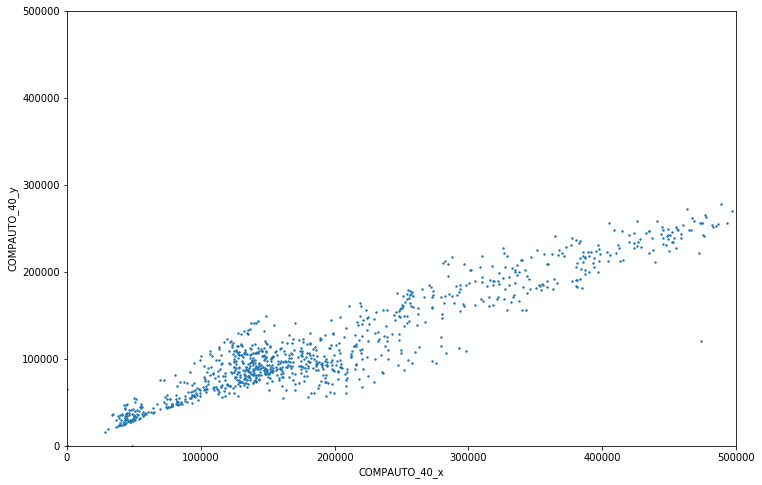

In [41]:
# get a sample of the data (first 1000 rows in table)
composite_auto_2040_sample = composite_auto_2040.head(1000)

# Scatterplot function using new and old data, s argument controls the dot size
composite_auto_2040.head(1000).plot.scatter(x='COMPAUTO_40_x', y= 'COMPAUTO_40_y', figsize=(12,8), s=2, xlim=(0,500000), ylim=(0,500000))

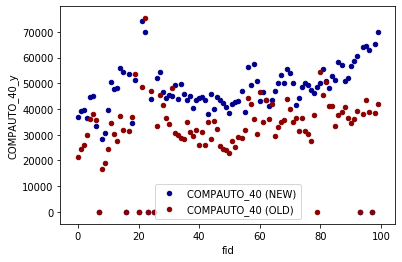

In [42]:
#ax = composite_auto_2040.head(100).plot(x='fid', y='COMPAUTO_40_x',figsize=(10,5), grid=True, kind ='scatter')
composite_auto_2040.head(100)
ax = composite_auto_2040.head(100).plot.scatter(x='fid', y='COMPAUTO_40_x', color='DarkBlue', label='COMPAUTO_40 (NEW)')
composite_auto_2040.head(100).plot.scatter(x='fid', y='COMPAUTO_40_y', color='DarkRed', label='COMPAUTO_40 (OLD)', ax=ax)